라이브러리 및 데이터를 가져옵시다.

In [2]:
# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 평가 패키지
from sklearn.linear_model import LinearRegression

import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt

boston = pd.read_csv("house_price.csv")

In [3]:
boston # 데이터 확인하기

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [4]:
# 결측치같은거 있으려나
boston.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV        0
CAT.MEDV    0
dtype: int64

없네? 다행이다!

In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
 14  CAT.MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


이상치 파악을 혼자 할 수 있을까?

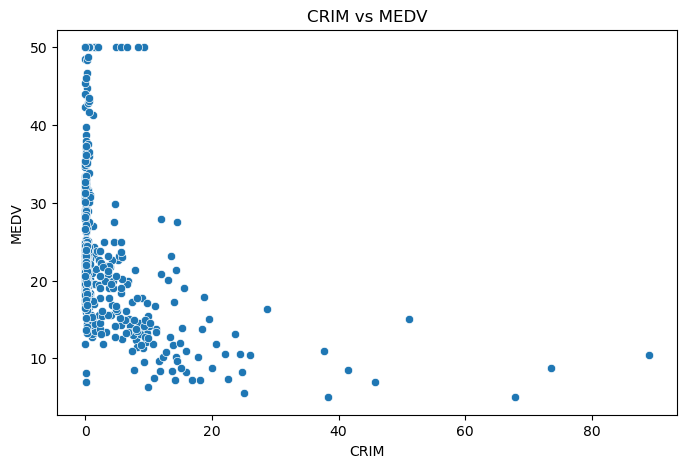

In [8]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = boston['CRIM'], y = boston['MEDV'])
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.title('CRIM vs MEDV')
plt.show()

In [9]:
def find_outlier_by_Tukey_DF(data, feature):
    q1, q3 = np.percentile(data[feature], [25,75])
    iqr = q3 - q1

    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    print(f'lower_bound는 {lower_bound.round(3)}, upper_bound는 {upper_bound.round(3)} 입니다')
    
    mask = data[(data[feature] > upper_bound) | (data[feature] < lower_bound)].index
    return mask
    
for column in boston.columns:
    mask = find_outlier_by_Tukey_DF(boston, column)
    print(f'{column}피처의 이상치는 {len(mask)}개 입니다')
    print('\n')

lower_bound는 -5.311, upper_bound는 9.07 입니다
CRIM피처의 이상치는 66개 입니다


lower_bound는 -18.75, upper_bound는 31.25 입니다
ZN피처의 이상치는 68개 입니다


lower_bound는 -14.175, upper_bound는 37.465 입니다
INDUS피처의 이상치는 0개 입니다


lower_bound는 0.0, upper_bound는 0.0 입니다
CHAS피처의 이상치는 35개 입니다


lower_bound는 0.187, upper_bound는 0.886 입니다
NOX피처의 이상치는 0개 입니다


lower_bound는 4.778, upper_bound는 7.731 입니다
RM피처의 이상치는 30개 입니다


lower_bound는 -28.55, upper_bound는 167.65 입니다
AGE피처의 이상치는 0개 입니다


lower_bound는 -2.532, upper_bound는 9.821 입니다
DIS피처의 이상치는 5개 입니다


lower_bound는 -26.0, upper_bound는 54.0 입니다
RAD피처의 이상치는 0개 입니다


lower_bound는 -301.5, upper_bound는 1246.5 입니다
TAX피처의 이상치는 0개 입니다


lower_bound는 13.2, upper_bound는 24.4 입니다
PTRATIO피처의 이상치는 15개 입니다


lower_bound는 344.106, upper_bound는 427.496 입니다
B피처의 이상치는 77개 입니다


lower_bound는 -8.058, upper_bound는 31.963 입니다
LSTAT피처의 이상치는 7개 입니다


lower_bound는 5.062, upper_bound는 36.963 입니다
MEDV피처의 이상치는 40개 입니다


lower_bound는 0.0, upper_bound는 0.0 입니다
CAT.MEDV피처의 이상치는 84개 입니다




이상치 개수 자체는 알겠다. 다만 저 이상치들을 모두 삭제해도 되는걸까? 고민이다.

여기서 분기점을 나눠, 우선 이상치를 모두 유지하는 방향으로 전개해보도록 하겠다.

In [11]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
 14  CAT.MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


boston 데이터 각 컬럼 파악하기

샘플 506개, 15 컬럼

* CRIM: 범죄율
* ZN: 25,000 평방피트를 초과 거주지역 비율 # 뭔뜻이지
* INDUS: 비소매상업지역 면적 비율
* CHAS: 찰승강의 경계에 위치 여부, Y:1, N:0
* NOX: 일상화질소 농도
* RM: 주택당 방 수
* AGE: 1940년 이전에 건축된 주택의 비율
* DIS: 직업센터의 거리
* RAD: 방사형 고속도로까지의 거리
* TAX: 재산세율
* PTRATIO: 학생/교사 비율
* B: 인구 중 흑인 비율
* LSTAT: 인구 중 하위 계층 비율
* MEDV: 주택가격
* CAT.MEDV: MEDV가 $30,000을 넘는지에 대한 변수

나는 여기서 주택가격을 영향을 받는 종속변수(y)로 두고 싶고, 다른 독립변수들이 종속 변수에 미치는 영향을 보고 싶다.

다만 CAT.MEDV는 MEDV와 관련성이 높기에 drop 하는게 좋을 것 같다.

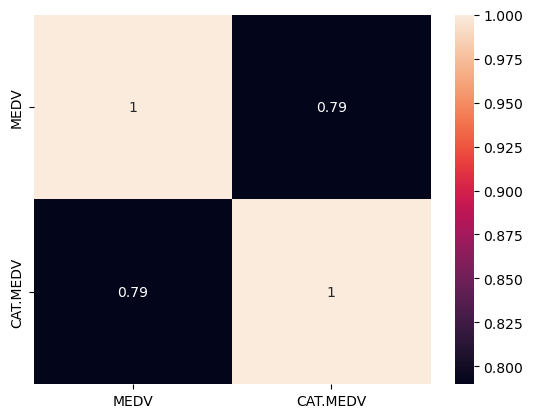

In [13]:
sns.heatmap(boston[['MEDV', 'CAT.MEDV']].corr(), annot = True)
plt.show()

In [14]:
boston.drop('CAT.MEDV', axis = 1, inplace = True)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


독립변수 13개를 범주형과 수치형으로 구분하자.

범주형:
* CHAS: 찰스강의 경계에 위치 여부, Y:1, N:0

수치형:
* CRIM: 범죄율
* ZN: 25,000 평방피트를 초과 거주지역 비율 # 뭔뜻이지
* INDUS: 비소매상업지역 면적 비율
* NOX: 일상화질소 농도
* RM: 주택당 방 수
* AGE: 1940년 이전에 건축된 주택의 비율
* DIS: 직업센터의 거리
* RAD: 방사형 고속도로까지의 거리 # 정수형으로 나오는거 봐서는 범주형인가?
* TAX: 재산세율 # 얘도 int로 자료값이 나오는데 왜지.
* PTRATIO: 학생/교사 비율
* B: 인구 중 흑인 비율
* LSTAT: 인구 중 하위 계층 비율

실습에서는 모델 돌려보기 - 다중공선성 파악 - 다시 모델 돌리기로 진행하였었는데,

나는 우선 다중공선성을 먼저 파악하고 영향을 미치는 피처에 대해 삭제를 한 후 과정을 전개해보도록 하자.

<Axes: >

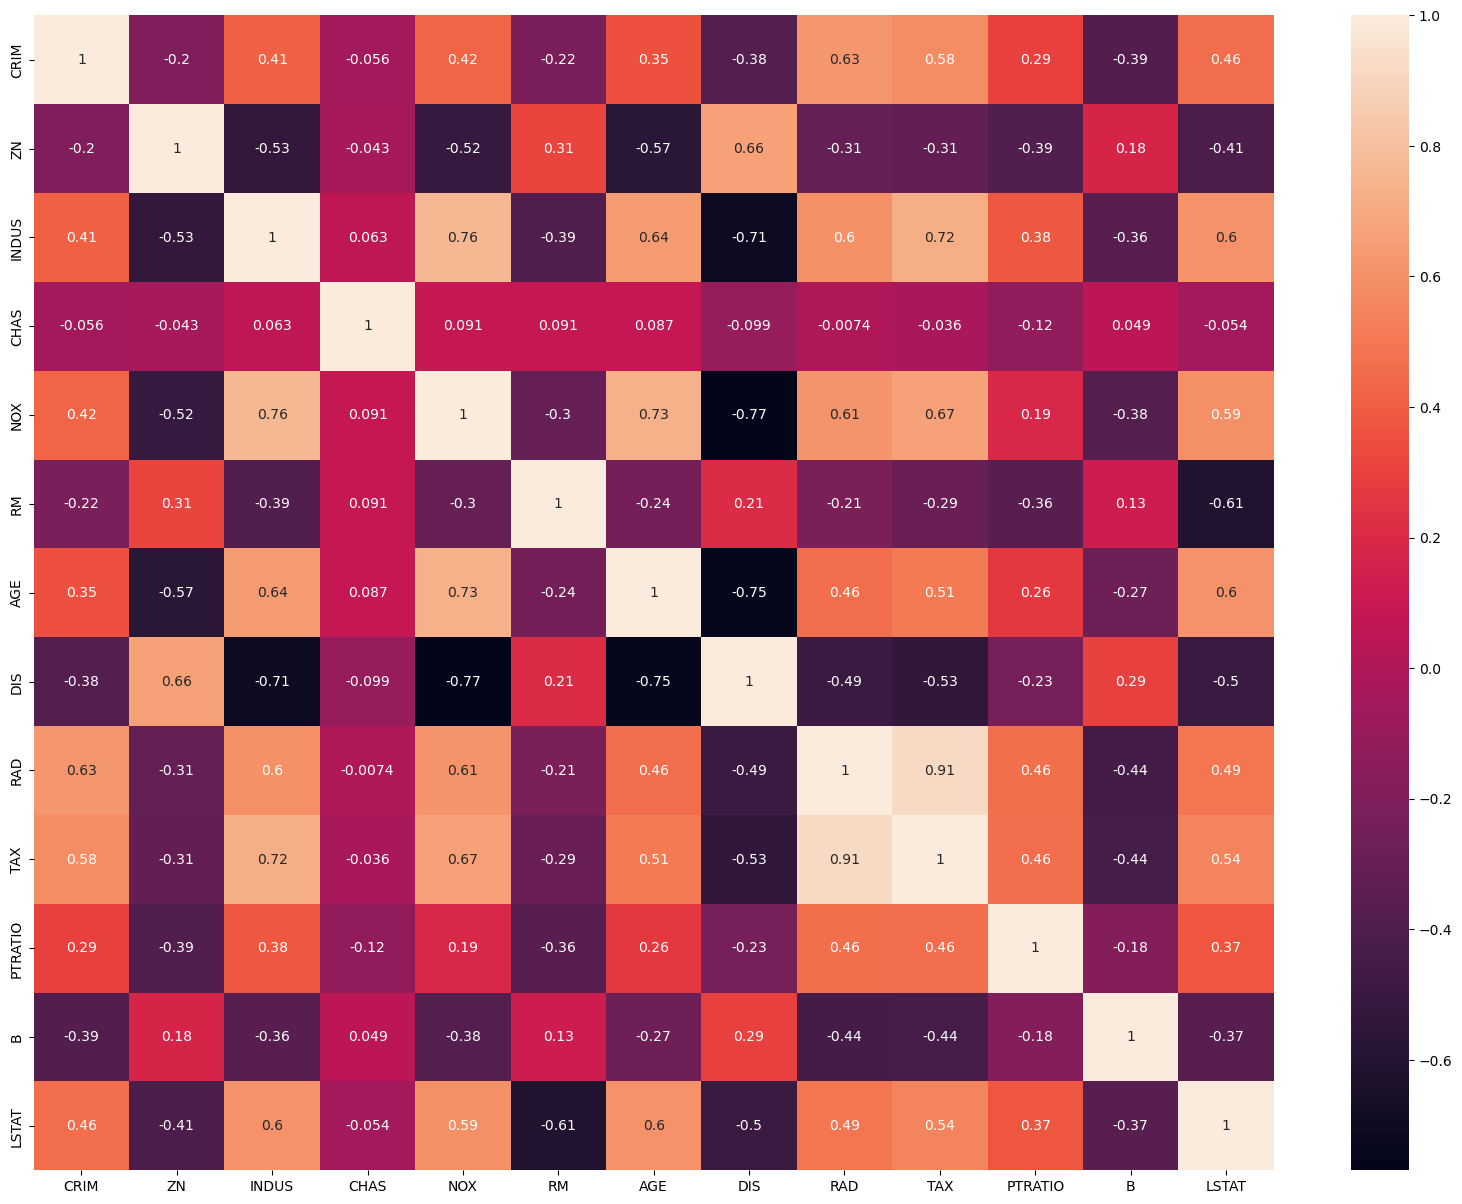

In [17]:
# 독립변수와 종속변수 선언 및 저장
X = boston.drop('MEDV', axis = 1)
y = boston['MEDV']

plt.figure(figsize = (20, 15))

sns.heatmap(X.corr(), annot = True)

오 정말 한 눈에 안들어오는군요?

VIF를 통해 확인합시다.

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(X):
    vif_data = pd.DataFrame()
    vif_data['Features'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
    print(vif_data)
vif(X)

   Features        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


우선 가장 높은 PTRATIO를 없애겠습니다.

In [21]:
vif(X.drop('PTRATIO', axis = 1))

   Features        VIF
0      CRIM   2.099345
1        ZN   2.451624
2     INDUS  14.275283
3      CHAS   1.142167
4       NOX  73.894171
5        RM  60.598846
6       AGE  21.361234
7       DIS  12.221605
8       RAD  15.159162
9       TAX  59.301541
10        B  18.614751
11    LSTAT  10.138324


그 다음으로 높은 RM도 제거해보죠

In [23]:
vif(X.drop(['PTRATIO', 'RM'], axis = 1))

   Features        VIF
0      CRIM   2.095455
1        ZN   2.433975
2     INDUS  13.958978
3      CHAS   1.141165
4       NOX  50.491344
5       AGE  19.961762
6       DIS   9.573301
7       RAD  15.102917
8       TAX  58.686042
9         B  16.588839
10    LSTAT   8.480702


여전히 높군요. 이번에는 TAX를 없애보겠습니다.

In [25]:
vif(X.drop(['PTRATIO', 'RM', 'TAX'], axis = 1))

  Features        VIF
0     CRIM   2.095430
1       ZN   2.349024
2    INDUS  11.010840
3     CHAS   1.119830
4      NOX  46.856834
5      AGE  19.899777
6      DIS   9.086148
7      RAD   5.167844
8        B  16.435073
9    LSTAT   8.468935


NOX도 없애겠습니다.

In [27]:
vif(X.drop(['PTRATIO', 'RM', 'TAX', 'NOX'], axis = 1))

  Features        VIF
0     CRIM   2.095367
1       ZN   2.334763
2    INDUS   9.016142
3     CHAS   1.116229
4      AGE  14.000758
5      DIS   8.447694
6      RAD   4.771767
7        B  13.537020
8    LSTAT   8.358925


마지막으로 한번,,,

In [44]:
vif(X.drop(['PTRATIO', 'RM', 'TAX', 'NOX', 'AGE'], axis = 1))

  Features        VIF
0     CRIM   2.095211
1       ZN   2.313889
2    INDUS   8.205465
3     CHAS   1.106350
4      DIS   8.209371
5      RAD   4.689836
6        B  10.074224
7    LSTAT   6.856889


VIF 지수가 높은 피처들에 대해 삭제를 진행하였습니다.

든 생각은 '이렇게 많은 피처들을 다 날려도 될까...?' 였습니다.\
또한 이상치에 대해 및 처리를 안하고 온 부분도 마음에 걸리고요.

하지만 일단 더 진행시켜보도록 하겠습니다.

In [47]:
X.drop(['PTRATIO', 'RM', 'TAX', 'NOX', 'AGE'], axis = 1, inplace = True)

데이터를 훈련 데이터와 시험 테스트로 나눕니다.\
이를 통해 추후 시험데이터와 모델을 비교해 얼마나 모델이 일리있는지 확인 가능할거에요.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 515)

# StatModels: 통계 분석 도구
* 다양한 옵션X but Stata/R과 같은 다른 통계 프로그램에서 검증된 통계 및 계량 도구 제공
* 불연속 종속 변수에 대한 옵션 풍부

*먼저 StatModels로 해보자*

StatsModels의 경우 상수항이 없기에 add_contant를 통해 상수항을 고려해야 해요.

In [53]:
X_train = sm.add_constant(X_train)

In [55]:
# model 변수에 sm.OLS를 저장_train 데이터 사용
model = sm.OLS(y_train, X_train)
# 모델 학습시키기
model_trained = model.fit()

In [57]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     88.14
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           4.88e-83
Time:                        19:41:23   Log-Likelihood:                -1262.1
No. Observations:                 404   AIC:                             2542.
Df Residuals:                     395   BIC:                             2578.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8078      2.003     20.870      0.0

RAD에 대한 p값이 너무 높다. 제거해보자.

In [60]:
X_train_sm = X_train.drop('RAD', axis = 1)

model = sm.OLS(y_train, X_train_sm)
model_trained = model.fit()

print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     101.0
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           4.76e-84
Time:                        19:41:26   Log-Likelihood:                -1262.1
No. Observations:                 404   AIC:                             2540.
Df Residuals:                     396   BIC:                             2572.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8762      1.965     21.311      0.0

'B'에 대한 p값도 높아요. 피처'B'도 삭제하는게 나을까요?\
일단 삭제하고 진행해보겠습니다.

In [63]:
X_train_sm = X_train_sm.drop('B', axis = 1)

model = sm.OLS(y_train, X_train_sm)
model_trained = model.fit()

print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     117.5
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           8.09e-85
Time:                        19:41:37   Log-Likelihood:                -1262.8
No. Observations:                 404   AIC:                             2540.
Df Residuals:                     397   BIC:                             2568.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.4853      1.381     31.491      0.0

전반적으로 p값이 튀는건 이제 없는 것 같습니다.\
이제 모델과 test 데이터셋을 비교해보겠습니다.

In [66]:
X_test_sm = sm.add_constant(X_test) # test데이터에도 상수항을 추가해주고

In [68]:
y_test_pred = model_trained.predict(X_test_sm.drop(['RAD', 'B'], axis = 1))
y_test_pred

11     18.794923
54     22.461802
266    27.581017
473    21.956132
57     32.524239
         ...    
353    23.486881
240    22.758172
184    25.394856
100    27.284880
190    29.467385
Length: 102, dtype: float64

In [70]:
print(mean_squared_error(y_test, y_test_pred))

33.52752735313377


In [72]:
print(mean_absolute_error(y_test, y_test_pred))

4.158244779919997


In [74]:
print(r2_score(y_test, y_test_pred))

0.594685754834352


In [76]:
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))

Testing MSE: 33.528
Testing MAE: 4.158
Testing R2: 0.595


이 회귀모델은 test 데이터에 대해 59퍼센트 정도의 설명력을 가진다고 생각할 수 있겠네요.

다음 Sklearn 모델로 해보기 전에 분기점들을 한번 정리해볼게요.
1. 이상치 확인 및 처리 → 안하고 일단 넘어옴. (피처 13개 생존)
2. 'PTRATIO', 'RM', 'TAX', 'NOX', 'AGE' 피처 5개에 대해 VIF 지수가 높은 것을 근거로 **삭제**함 (피처 8개 생존)
3. 'RAD', 'P'에 대해 P값이 높은 것을 근거로 **삭제** (피처 6개 생존)

최종적으로 13개로 시작한 피처가 마지막엔 6개밖에 남지 않았습니다. 뭔가 많이 아쉬워요.

각 분기점에서 약간씩만 다르게 선택을 했다면 더 높은 설명력을 지닌 모델을 만들 수 있었을까요?\
고민해볼 문제같습니다.

자 이번에는 Sklearn을 기반으로 만들어보겠습니다.

# Sklearn
* 개발 속도, 유저 사용량 ↑
* 분류, 회귀 또는 클러스터링 알고리즘과 관련하여 간단하고 배우기 쉬운 알고리즘을 제공
* 다양한 평가 지표 제공

* 이번에는 Sklearn으로 해보자.

In [83]:
lr_skl = LinearRegression()
lr_skl.fit(X_train.drop('const', axis = 1), y_train)

y_pred_skl = lr_skl.predict(X_test)

y_pred_skl

array([18.86697528, 22.54120469, 27.61963238, 22.16700708, 32.53956732,
       26.17313829, 15.81635048, 14.63064016, 20.29911581, 22.82660034,
       21.61163259, 18.71478522, 23.14950184, 35.29218939, 24.31976663,
       19.75087043, 30.92901918, 33.44787467, 26.36324134,  6.62171115,
       22.05963529, 19.04415108, 19.28956904, 25.49765885, 14.66837184,
       29.68996768, 16.85024156, 23.15219466, 29.84338097, 13.29891715,
       33.61452959, 31.07265994, 29.0338692 , 22.72803523, 27.34781721,
       34.00731653, 26.38372505, 22.39297842, 19.96008695, 37.13785588,
       36.02708249, 17.40094079, 29.24040926, 23.97558909, 13.93872133,
       19.8389214 , 28.78153863, 16.68663445, 31.55959572, 25.32231266,
       27.55563752, 26.2256536 , 17.80467606, 38.72726212, 18.88926704,
       24.69100307, 32.17423576, 13.61179502, 25.16017189, 23.18300942,
       31.87176284, 21.25485779, 18.19640702, 21.17076784, 22.69293986,
       16.08019086, 35.11387042, 32.2052114 , 27.88790177, 31.30

In [85]:
test_mse_skl = mean_squared_error(y_test, y_pred_skl)
test_mae_skl = mean_absolute_error(y_test, y_pred_skl)
test_re_skl = r2_score(y_test, y_pred_skl)

print('Testing MSE: {:.3f}'.format(test_mse_skl))
print('Testing MAE: {:.3f}'.format(test_mae_skl))
print('Testing R2: {:.3f}'.format(test_re_skl))

Testing MSE: 32.774
Testing MAE: 4.063
Testing R2: 0.604


현재 이 모델은 60%의 설명력을 지니고 있네요.

다만 든 생각은 이 모델의 경우 X_train으로 모델링을 진행하였기에, 'RAD'와 'B'가 아직 남아있을텐데요.

한번 이 친구에 한해 분기점을 나눠 statsmodel과 같게 두 피처를 삭제해본 후 진행해볼게요.

In [90]:
lr_skl = LinearRegression()
lr_skl.fit(X_train.drop(['const', 'RAD', 'B'], axis = 1), y_train)

y_pred_skl = lr_skl.predict(X_test.drop(['RAD', 'B'], axis = 1))

y_pred_skl

array([18.79492311, 22.46180165, 27.58101652, 21.95613187, 32.52423928,
       26.10387341, 16.883659  , 14.5678442 , 20.1930528 , 22.752409  ,
       21.67507565, 18.5297132 , 23.52591951, 35.31305107, 24.26912495,
       20.14071381, 30.95002886, 33.43389195, 26.33075997,  7.63186426,
       21.93480926, 19.00283789, 19.22283998, 25.50025668, 15.89618709,
       29.66238731, 16.68466693, 23.08937123, 29.75052105, 13.20307396,
       33.64338561, 31.08575784, 29.04533946, 22.69695328, 27.30912722,
       33.98652357, 26.38501229, 22.52019519, 19.98695752, 37.13513937,
       35.98935561, 17.23555751, 29.22411142, 24.01234781, 13.63296588,
       19.79121753, 28.77936434, 17.92426131, 31.57742117, 25.27365962,
       27.44965222, 26.1736606 , 18.6268279 , 38.72031757, 19.65069307,
       24.76101331, 32.17794279, 13.24022793, 24.88495467, 23.15493335,
       31.82270851, 21.1348166 , 18.09384545, 21.17921301, 22.6291495 ,
       16.09079698, 35.09771839, 32.22696479, 27.85717945, 31.46

In [92]:
test_mse_skl = mean_squared_error(y_test, y_pred_skl)
test_mae_skl = mean_absolute_error(y_test, y_pred_skl)
test_re_skl = r2_score(y_test, y_pred_skl)

print('Testing MSE: {:.3f}'.format(test_mse_skl))
print('Testing MAE: {:.3f}'.format(test_mae_skl))
print('Testing R2: {:.3f}'.format(test_re_skl))

Testing MSE: 33.528
Testing MAE: 4.158
Testing R2: 0.595


아하 StatsModel과 같은 값이 출력되었습니다.

다만 흥미로운 점은 P값이 높다고 피처를 추가로 2개 삭제한 모델이 오히려 설명력은 떨어졌다는 점입니다.

역시 피처를 함부로 삭제하면 안된다인걸까요?

고민해볼만한 이슈같습니다.

여전히 계속 아쉬운 점은 이상치를 별도로 처리하지 못한 점입니다.\
더 높은 설명력을 가져갈 수 있었을 것 같은데, 많이 아쉽습니다.\